In [1]:
import numpy as np

In [4]:
import pandas as pd

In [10]:
employee=[f'EMP_{i:03d}'for i in range(1,31)] 
dates=pd.date_range("2025-07-01",periods=30,freq="D")

In [11]:
employee_ids

['EMP_001',
 'EMP_002',
 'EMP_003',
 'EMP_004',
 'EMP_005',
 'EMP_006',
 'EMP_007',
 'EMP_008',
 'EMP_009',
 'EMP_010',
 'EMP_011',
 'EMP_012',
 'EMP_013',
 'EMP_014',
 'EMP_015',
 'EMP_016',
 'EMP_017',
 'EMP_018',
 'EMP_019',
 'EMP_020',
 'EMP_021',
 'EMP_022',
 'EMP_023',
 'EMP_024',
 'EMP_025',
 'EMP_026',
 'EMP_027',
 'EMP_028',
 'EMP_029',
 'EMP_030']

In [14]:
data={
    "Date":np.tile(dates,len(employee_ids)),
    "Employee_ID":np.repeat(employee_ids,len(dates)),
    "Working_Hours":np.random.uniform(4,10,size=len(dates)*len(employee_ids)).round(2)

}

In [15]:
df=pd.DataFrame(data)

In [16]:
df

,Date,Employee_ID,Working_Hours
0,2025-07-01,EMP_001,6.52
1,2025-07-02,EMP_001,8.01
2,2025-07-03,EMP_001,7.45
3,2025-07-04,EMP_001,7.29
4,2025-07-05,EMP_001,5.87
...,...,...,...
895,2025-07-26,EMP_030,8.65
896,2025-07-27,EMP_030,4.24
897,2025-07-28,EMP_030,7.45
898,2025-07-29,EMP_030,7.87


In [17]:
df.to_csv("employee_working_hours.csv",index=False)

In [18]:
df_csv=pd.read_csv("employee_working_hours.csv")

In [20]:
df_csv

,Date,Employee_ID,Working_Hours
0,2025-07-01,EMP_001,6.52
1,2025-07-02,EMP_001,8.01
2,2025-07-03,EMP_001,7.45
3,2025-07-04,EMP_001,7.29
4,2025-07-05,EMP_001,5.87
...,...,...,...
895,2025-07-26,EMP_030,8.65
896,2025-07-27,EMP_030,4.24
897,2025-07-28,EMP_030,7.45
898,2025-07-29,EMP_030,7.87


In [21]:
print(df_csv.head())
print(df_csv.describe())
print(df_csv["Employee_ID"].nunique())

         Date Employee_ID  Working_Hours
0  2025-07-01     EMP_001           6.52
1  2025-07-02     EMP_001           8.01
2  2025-07-03     EMP_001           7.45
3  2025-07-04     EMP_001           7.29
4  2025-07-05     EMP_001           5.87
       Working_Hours
count     900.000000
mean        6.931289
std         1.760171
min         4.000000
25%         5.420000
50%         6.935000
75%         8.382500
max        10.000000
30


In [24]:
total_hours=df_csv.groupby("Employee_ID")["Working_Hours"].sum().sort_values(ascending=False)
print(total_hours)

Employee_ID
EMP_006    230.29
EMP_025    226.44
EMP_023    225.40
EMP_024    223.17
EMP_019    221.42
EMP_028    220.66
EMP_012    218.67
EMP_020    214.19
EMP_015    213.00
EMP_021    212.81
EMP_001    211.78
EMP_018    210.95
EMP_004    210.50
EMP_030    210.43
EMP_008    206.93
EMP_007    206.26
EMP_026    205.96
EMP_017    205.23
EMP_002    204.82
EMP_022    203.97
EMP_029    203.20
EMP_005    201.25
EMP_003    200.82
EMP_014    200.81
EMP_016    197.49
EMP_010    193.67
EMP_011    192.70
EMP_013    192.41
EMP_027    187.34
EMP_009    185.59
Name: Working_Hours, dtype: float64


In [30]:
avg_daily = df_csv.groupby("Employee_ID")["Working_Hours"].mean()

In [31]:
threshold_low=5
threshold_high=9
df_csv["Low_Hour_Flag"]=df_csv["Working_Hours"]<threshold_low
df_csv["High_Hour_Flag"]=df_csv["Working_Hours"]>threshold_high
print(df_csv[df_csv["Low_Hour_Flag"]|df_csv["High_Hour_Flag"]].head())

          Date Employee_ID  Working_Hours  Low_Hour_Flag  High_Hour_Flag
5   2025-07-06     EMP_001           9.42          False            True
7   2025-07-08     EMP_001           9.78          False            True
8   2025-07-09     EMP_001           9.41          False            True
10  2025-07-11     EMP_001           4.07           True           False
13  2025-07-14     EMP_001           4.55           True           False


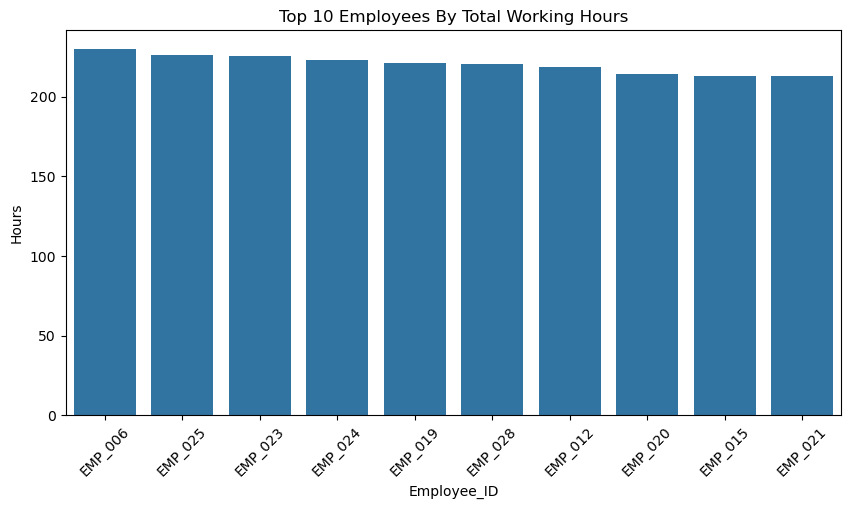

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
top10=total_hours.head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top10.index,y=top10.values)
plt.xticks(rotation=45)
plt.title("Top 10 Employees By Total Working Hours")
plt.ylabel("Hours")
plt.tight_layout
plt.show()

In [33]:
Grades=df.loc[(df["Employee_ID"]=="EMP_023")]

In [34]:
print(Grades)

          Date Employee_ID  Working_Hours
660 2025-07-01     EMP_023           8.04
661 2025-07-02     EMP_023           8.67
662 2025-07-03     EMP_023           8.78
663 2025-07-04     EMP_023           9.93
664 2025-07-05     EMP_023           6.95
665 2025-07-06     EMP_023           7.71
666 2025-07-07     EMP_023           7.91
667 2025-07-08     EMP_023           6.08
668 2025-07-09     EMP_023           8.64
669 2025-07-10     EMP_023           8.86
670 2025-07-11     EMP_023           6.82
671 2025-07-12     EMP_023           5.79
672 2025-07-13     EMP_023           7.55
673 2025-07-14     EMP_023           6.52
674 2025-07-15     EMP_023           7.49
675 2025-07-16     EMP_023           8.69
676 2025-07-17     EMP_023           9.08
677 2025-07-18     EMP_023           6.02
678 2025-07-19     EMP_023           4.63
679 2025-07-20     EMP_023           8.55
680 2025-07-21     EMP_023           7.02
681 2025-07-22     EMP_023           9.32
682 2025-07-23     EMP_023        